Define the problem.
The problem is predicting the products rating to gain prior knowledge of customers'
preferences for products, which further improves the website's sales process.
************************************************************************************************************************
What is the input? 
Our inputs are a lot of features I will show them next slides
************************************************************************************************************************
What is the output?
Rating of the products depend on some features.
************************************************************************************************************************
What data mining function is required?
The model is classification model.

What could be the challenges?
containing different ranges needed to be scaled.
containing some columns needed to be adjusted.
containing many of missing values.
containing Not important columns.
containing categorical columns. 
************************************************************************************************************************
What is the impact?
The impact is making misleading to the model to predict and classify  the right rating for each model.
************************************************************************************************************************
What is an ideal solution?
The ideal solution is to make good preprocessing on each column and take the columns that will help the model to predict the right rating 


1. Why Data Mining is a misnomer? What is another preferred name?
************************************************************************************************************************

Data mining is a misnomer, because the goal is the extraction of patterns 
and knowledge from large amounts of data, not the extraction (mining) of data itself.
Data mining is also known as Knowledge Discovery in Data (KDD).


2. What is the general knowledge discovery process? 
What is the difference between a data engineer and data scientist/AI engineer?

knowledge discovery can be defined as the process of identifying interesting and new patterns in data. These patterns can include relations, events or trends, and they can reveal both exceptions and regularities. In the core of the process, data mining methods are utilized for extracting and verifying patterns.
************************************************************************************************************************

Data engineers create and maintain key data infrastructures like databases, data warehouses, and data pipelines. Data engineers also prepare data for production by converting raw, unstructured data into a structured format that can be analyzed and interpreted. 
************************************************************************************************************************

Data scientists analyze and interpret data to solve business problems. Initially, data scientists explore data and conduct market research in order to formulate business questions around a specific trend or pain point. Data scientists must then frame business questions as data analytics problems.


3. In data mining,what is the difference between prediction and categorization?

- Functionality:
Classification is about determining a (categorial) class (or label) for an element in a dataset
Prediction is about predicting a missing/unknown element(continuous value) of a dataset
************************************************************************************************************************
- Working Strategy:
In classification, data is grouped into categories based on a training dataset.
In prediction, a classification/regression model is built to predict the outcome(continuous value)



4. Why data science/machine learning is a bad idea in the context of information security?

Machine learning was not designed with security in mind and as such is prone to adversarial manipulation and reverse engineering. While most data-based learning models rely on a static assumption of the world, the security landscape is one that is especially dynamic, with an ongoing never-ending arms race between the system designer and the attackers. 
Any solution designed for such a domain needs to consider an active adversary  and needs to evolve over time, in the face of emerging threats. We term this as the "Dynamic Adversarial Mining" problem


5. What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

widely-applicable security model is the CIA triad; standing for Confidentiality, Integrity and Availability; three key principles which should be guaranteed in any kind of secure system. This principle is applicable across the whole subject of Security Analysis, from access to a user's internet history to security of encrypted data across the internet. If any one of the three can be breached, it can have serious consequences for the parties concerned
In the information security (InfoSec) community, “CIA” has nothing to do with a certain well-recognized US intelligence agency.


In [587]:
# !pip3 install fuzzywuzzy

In [707]:
# !pip install plotly                #if you don't install plotly you can use this code 
# !pip install cufflinks             #if you don't install cufflinks you can use this code

# in this cell i made import to the libraries that i use it 

In [708]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, RFECV, VarianceThreshold
# from fuzzywuzzy import fuzz,process
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
import plotly.graph_objs as go
# import chart_studio.plotly as py
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
# Set global theme
cf.set_config_file(world_readable=True, theme='ggplot')
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

# first we will combine the training data and test data and make preprocessing on the them at the same time 

In [709]:
train_data=pd.read_csv('train_new.csv')  #Load traind_new Dataset 
test_data = pd.read_csv('test_new.csv')  #Load test_new Dataset 
test_data['rating'] = 0 #make column called rating in test_new dataset
df = pd.concat([train_data, test_data], ignore_index=True, sort=False) #concatenate the train_new dataset and test_new dataset
                                                                       #and combine them in dataset called df
df.shape #show df shape

(1573, 34)

In [710]:
df.info()  #show some details on the df using method info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   int64  
 6   rating_count                  1573 non-null   int64  
 7   badges_count                  1573 non-null   int64  
 8   badge_local_product           1573 non-null   int64  
 9   badge_product_quality         1573 non-null   int64  
 10  badge_fast_shipping           1573 non-null   int64  
 11  tags                          1573 non-null   object 
 12  product_color                 1532 non-null   object 
 13  pro

In [711]:
print('\n*****************check the values of each colomun are unique or not and how many number for each one*****************')
print(df.nunique())  #check the values of each colomun are unique or not and how many number for each one



*****************check the values of each colomun are unique or not and how many number for each one*****************
price                            129
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating                             7
rating_count                     761
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              16
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
has_urgency_banner                 1
urgency_text                       2
origin_country                     6
merchant_title                

# theme Column

In [712]:
df.theme.value_counts() #show the valuse of the column and the number of repeats

summer    1573
Name: theme, dtype: int64

In [713]:
df.drop('theme', axis=1, inplace=True) #in this line i dropped the theme column because it contain only one value 

# Urgency Text and Urgency Banner
Both columns have null values, and in very large number so i drop them.

In [714]:
#drop two columns urgency_text','has_urgency_banner

df.drop(['urgency_text','has_urgency_banner'], inplace=True,axis=1) 

# Badges Columns
convert 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping' into categorical values

In [715]:
#this bring all columns that start with badge 
df.loc[:,df.columns.str.startswith('badge')].columns

Index(['badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping'],
      dtype='object')

In [716]:
#in this cell i convert the valuse of this columns to 
#Categorical values to show to the model that it is categorical 
df[['badge_local_product', 'badge_product_quality',         
    'badge_fast_shipping']] = df[['badge_local_product',                                             
                                  'badge_product_quality','badge_fast_shipping']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   int64  
 6   rating_count                  1573 non-null   int64  
 7   badges_count                  1573 non-null   int64  
 8   badge_local_product           1573 non-null   object 
 9   badge_product_quality         1573 non-null   object 
 10  badge_fast_shipping           1573 non-null   object 
 11  tags                          1573 non-null   object 
 12  product_color                 1532 non-null   object 
 13  pro

In [717]:
df.badge_fast_shipping.value_counts()

0    1553
1      20
Name: badge_fast_shipping, dtype: int64

In [718]:
# df.drop('badge_fast_shipping' , inplace=True , axis=1)

# Currency Column



In [719]:
#in this cell i show if this col has alot of values 
df.currency_buyer.unique()

array(['EUR'], dtype=object)

currency is only in euros. drop the column

In [720]:
df.drop('currency_buyer', inplace=True, axis=1)    #drop the column

# in this step we fill the null values by ffill method  

In [721]:
#propagate last valid observation forward to next valid 
df['product_variation_size_id']=df['product_variation_size_id'].fillna(method = 'ffill' , axis=0) 
# df['merchant_info_subtitle']=df['merchant_info_subtitle'].fillna(method = 'ffill' , axis=0)
# df['product_color'] = df['product_color'].fillna(method='bfill' , axis=0)

# Crawl Month

In [722]:
df.crawl_month.unique()     #check the values of crawl_month

array(['2020-08'], dtype=object)

crawl month is only from August,drop this column.

In [723]:
df.drop('crawl_month', inplace=True, axis=1) #drop column.

# in this figure show the values of rating and the percentage of each one 

In [724]:
#this show the rating of train dataset so it stell has value equal 6 "this file without any  update"
dependent_classes_labels= train_data.rating.value_counts().index.values  
dependent_classes_values = train_data.rating.value_counts().values
fig = go.Figure()
fig.add_trace(go.Pie(labels=dependent_classes_labels, values=dependent_classes_values))
fig.update_layout(title="Imbalances in Dependent Classes", legend_title="Target Classes", template="plotly_dark")

# check the values of rating column 

In [725]:
df.rating.value_counts()  #check the values of rating should be from 1 to 5 only 

4    774
0    479
5    170
3    135
2     12
1      2
6      1
Name: rating, dtype: int64

In [726]:
#check if we have any rating more than 5  and detrmine the index of it 
df.loc[df['rating'] > 5]

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,id
971,49.0,42,100,0,6,6,1,0,0,1,...,CN,Yanfeng Living museum,yanfenglivingmuseum,"90 % avis positifs (29,977 notes)",29977,4.223138,5925555b2cd9447854443c41,0,NaN,118


In [727]:
#after i check if any rating more than 5 i found that only 
#one row has rating equal to 6 and the index is 971
#and i used at[] to update the value of the column rating at this index by 5 
df.at[971,'rating']=5

In [728]:
# this for print row index 971 to check if the value updated or not 
print(df.loc[971])  

price                                                                        49.0
retail_price                                                                   42
units_sold                                                                    100
uses_ad_boosts                                                                  0
rating                                                                          5
rating_count                                                                    6
badges_count                                                                    1
badge_local_product                                                             0
badge_product_quality                                                           0
badge_fast_shipping                                                             1
tags                            party,Goth,Plus Size,Summer,Dress,V-neck,bodyc...
product_color                                                            Rose red
product_variatio

In [729]:
#this for more checking if the value updated or not
#and i know that rating has values 0 this from test_new dataset
df.rating.value_counts()

4    774
0    479
5    171
3    135
2     12
1      2
Name: rating, dtype: int64

# Origin Country column
visualizations

In [730]:
#this cell show country of origin of Product in Wish "this visualization on train and test dataset"
labels = df.origin_country.value_counts(normalize=True).index.values 
values  = df.origin_country.value_counts().values
# Create Pie Chart
fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))
fig.update_layout(title="Country of Origin of Product in Wish", legend_title="Countries", template="plotly_dark")

the products mostly originate from China

In [731]:
#create so called discounts column by subtracting the price from retail_price to make this as new feature to use it 
df['discounted_price'] = df['retail_price'] - df['price']
#this code only to group the "price','discounted_price','retail_price','origin_country" by "origin_country"
#to show this relation between the country and discounted_price for each of them 
prices_by_country = df[['price','discounted_price','retail_price','origin_country']].groupby('origin_country').mean()

In [732]:
fig = go.Figure()
fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.price, name="Price"))
fig.add_trace(go.Scatter(x=prices_by_country.index.values, y=prices_by_country.discounted_price, name="Discounted Price"))
fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.retail_price, name="Retail Price"))
fig.update_layout(title="Prices Categories By Country", xaxis_title="Countries", yaxis_title="Avg Discount Prices", 
                  template="plotly_dark", legend_title="Legend")

The graph, displpays that theres a heavy discounts on prodcuts from Venezuela as displayed by red line by avg of around 26 euros

# Shipping Options and Prices

In [733]:
#this return each columns that contain word 'shipping'
df.loc[:,df.columns.str.startswith("shipping")].columns 

Index(['shipping_option_name', 'shipping_option_price', 'shipping_is_express'], dtype='object')

In [734]:
#this retur the short ddescription about shipping_option_name vlues
df['shipping_option_name'].value_counts() 

Livraison standard                           1508
Standard Shipping                              20
Envio Padrão                                    9
Expediere Standard                              6
Envío normal                                    5
الشحن القياسي                                   4
Standardowa wysyłka                             3
Standardversand                                 3
Livraison Express                               3
Стандартная доставка                            3
Spedizione standard                             2
Standart Gönderi                                2
การส่งสินค้ามาตรฐาน                             2
currency_buyer' , 'theme' , 'crawl_month'       1
ការដឹកជញ្ជូនតាមស្តង់ដារ                         1
Ekspresowa wysyłka                              1
Name: shipping_option_name, dtype: int64

Livraison standard is quite populuar option for shipping. i check the prices

In [735]:
livrasion_prices = df[df.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().index.values
livrasion_prices_frquency = df[df.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().values
fig = go.Figure()
fig.add_trace(go.Pie(labels=livrasion_prices, values=livrasion_prices_frquency))
fig.update_layout(title="Livrasion Standard Prices", legend_title="Prices In Euros", template="plotly_dark")

Most customers choose shipping options from 1-3 euros.

In [736]:
df['shipping_is_express'].value_counts()   #shipping_is_express valuses count 

0    1569
1       4
Name: shipping_is_express, dtype: int64

Almost all the shipping is not express so we can drop it 

In [737]:
df.drop('shipping_is_express' , inplace=True, axis=1)    #drop the column

In [738]:
df.drop('inventory_total' , inplace=True , axis = 1)

In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   units_sold                    1573 non-null   int64  
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   int64  
 5   rating_count                  1573 non-null   int64  
 6   badges_count                  1573 non-null   int64  
 7   badge_local_product           1573 non-null   object 
 8   badge_product_quality         1573 non-null   object 
 9   badge_fast_shipping           1573 non-null   object 
 10  tags                          1573 non-null   object 
 11  product_color                 1532 non-null   object 
 12  product_variation_size_id     1573 non-null   object 
 13  pro

In [740]:
df.merchant_has_profile_picture.value_counts() 

0    1347
1     226
Name: merchant_has_profile_picture, dtype: int64

In [741]:
df.drop('merchant_profile_picture' ,  inplace=True, axis=1) #drop the column

# IDs
Columns with ids will mislead our algorithms so lets drop them

In [742]:
df.drop(['merchant_id' , 'id'],axis=1, inplace=True)     #drop the columns

In [743]:
corr_df =df.corr().loc['rating']                         #this show corrollation of each column  to rating column
corr_df

price                           0.044306
retail_price                    0.039483
units_sold                      0.030855
uses_ad_boosts                 -0.011510
rating                          1.000000
rating_count                    0.024768
badges_count                    0.087689
product_variation_inventory    -0.007898
shipping_option_price           0.040162
countries_shipped_to            0.007227
merchant_rating_count           0.017713
merchant_rating                 0.072350
merchant_has_profile_picture    0.054588
discounted_price                0.034845
Name: rating, dtype: float64

In [744]:
# df.drop(['product_ariation_inventory' ,'uses_ad_boosts' , 'inventory_total' ] , inplace=True , axis=1)

In [745]:
df.columns                                                 #this cell show the dataset     

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'countries_shipped_to',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'discounted_price'],
      dtype='object')

# Origin Country, Shipping Names

In [746]:
#in this cell i drop some columns 
#not important in make rating
df.drop(['origin_country', 'shipping_option_name'  ,'merchant_name',  
           'merchant_title' ,],axis=1, inplace=True) 

In [747]:
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,discounted_price
0,8.00,7,10000,1,4,1670,0,0,0,0,...,yellow,M,50,3,30,"88 % avis positifs (66,644 notes)",66644,4.137582,1,-1.00
1,8.00,7,1000,0,4,843,1,1,0,0,...,black,L,50,3,37,"91 % avis positifs (25,752 notes)",25752,4.256873,0,-1.00
2,6.00,34,100,0,4,10,0,0,0,0,...,white,L,50,2,41,"83 % avis positifs (3,897 notes)",3897,3.928920,0,28.00
3,4.67,4,100,1,3,82,0,0,0,0,...,lakeblue,XS,5,1,25,"87 % avis positifs (7,497 notes)",7497,4.079365,0,-0.67
4,8.00,11,1000,0,4,127,0,0,0,0,...,apricot,S,50,3,15,91 % avis positifs (173 notes),173,4.306358,0,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,16.00,14,100,1,0,27,0,0,0,0,...,black,M,50,4,35,70 % avis positifs (572 notes),572,3.367133,0,-2.00
1569,6.00,17,5000,1,0,817,0,0,0,0,...,blue,XXS,1,2,41,"87 % avis positifs (50,864 notes)",50864,4.079644,1,11.00
1570,4.83,51,50,1,0,1,0,0,0,0,...,white,XS,3,1,39,85 % avis positifs (57 notes),57,3.824561,0,46.17
1571,3.00,3,100,1,0,8,0,0,0,0,...,black,34,3,1,26,"87 % avis positifs (1,086 notes)",1086,4.056169,0,0.00


# Tags
  refine tags column    
  tags set by the seller where customer can do search using it 

In [748]:
df['tags'].head()

0    Summer,soildcolor,Plus Size,Tank,camisole,Tops...
1    bathing suit,Plus Size,bikini set,sexy swimsui...
2    Summer,Vest,momshirt,Get,summer t-shirts,funny...
3    Summer,Shorts,pants,Beach,Plus Size,beachpant,...
4    Summer,Floral print,women dresses,fashion dres...
Name: tags, dtype: object

In [749]:
df['tags']=df['tags'].str.lower()                              #convert all values of this column to lowercase
df['n_tags'] = df['tags'].apply(lambda x: len(x.split(",")))   #split the values of each row for tags column 
# df['n_tags'].head(50)                                        #and count each row value 
print(df['tags'].head())                                       #this to print tags after convert it to loowercase

0    summer,soildcolor,plus size,tank,camisole,tops...
1    bathing suit,plus size,bikini set,sexy swimsui...
2    summer,vest,momshirt,get,summer t-shirts,funny...
3    summer,shorts,pants,beach,plus size,beachpant,...
4    summer,floral print,women dresses,fashion dres...
Name: tags, dtype: object


In [750]:
bag_of_words= ['summer',                                  #this is more words customer use it for seach 
                 "women's fashion",
                 'fashion',
                 'women',
                 'casual',
                 'plus size',
                 'sleeveless',
                 'dress',
                 'shorts',
                 'tops',
                 'sexy',
                 'beach',
                 'sleeve',
                 'short sleeves',
                 'print',
                 'shirt',
                 'tank',
                 'necks',
                 'v-neck',
                 'printed']


1 First replace uppercases with lowercases

2 Create separate columns with top 20 tags 'bag_of_words'

In [751]:
for word in bag_of_words:
    # First check if str contains the word
    #If yes converto to 1 , if no convert to 0
    # Again convert 1 and 0 into strings for dummy variables later.
    df["tag_"+word] = df.tags.str.lower().str.contains(word).astype(int).astype(str)

In [752]:
df.drop(['tags'],axis=1,inplace=True)  #now we can drop tags column

In [753]:
df.head()
df.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'countries_shipped_to',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'discounted_price', 'n_tags',
       'tag_summer', 'tag_women's fashion', 'tag_fashion', 'tag_women',
       'tag_casual', 'tag_plus size', 'tag_sleeveless', 'tag_dress',
       'tag_shorts', 'tag_tops', 'tag_sexy', 'tag_beach', 'tag_sleeve',
       'tag_short sleeves', 'tag_print', 'tag_shirt', 'tag_tank', 'tag_necks',
       'tag_v-neck', 'tag_printed'],
      dtype='object')

# Product Color


In [754]:
print(df['product_color'].unique())  #from this method we determine the values of this column
print(df['product_color'].value_counts())

['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'White' 'white & green' 'multicolor'
 'lightpink' 'pink' 'RED' 'armygreen' 'lightblue' nan 'coffee' 'grey'
 'skyblue' 'watermelonred' 'pink & black' 'whitefloral' 'purple' 'navy'
 'pink & white' 'rosered' 'orange' 'Black' 'mintgreen' 'leopardprint'
 'gray' 'navy blue' 'star' 'rose' 'lightyellow' 'camouflage'
 'black & yellow' 'whitestripe' 'navyblue & white' 'black & blue'
 'lightred' 'violet' 'gold' 'black & green' 'white & black' 'burgundy'
 'black & white' 'lightgrey' 'coolblack' 'lightgreen' 'beige' 'darkblue'
 'darkgreen' 'silver' 'wine red' 'Army green' 'pink & blue' 'rainbow'
 'claret' 'floral' 'brown & yellow' 'light green' 'Pink' 'blue & pink'
 'dustypink' 'camel' 'orange-red' 'rosegold' 'ivory' 'fluorescentgreen'
 'winered & yellow' 'offwhite' 'lightgray' 'wine' 'army' 'applegreen'
 'nude' 'pink & grey' 'Rose red' 'denimblue' 'blackwhite' 'Blue' 'leopard'
 'coralred' 'tan

<AxesSubplot:title={'center':'Distribution of Products by Color'}, xlabel='Color', ylabel='Percentage of Products'>

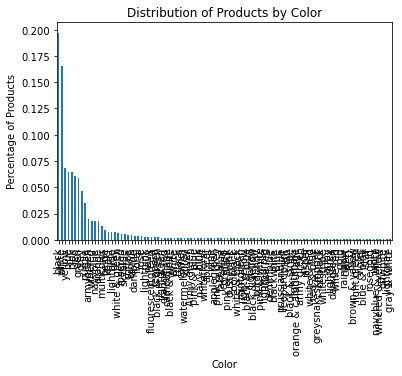

In [755]:
#plot number each color
plt.title('Distribution of Products by Color')   
plt.ylabel('Percentage of Products')
plt.xlabel('Color')
df['product_color'].value_counts(normalize=True).plot(kind='bar')

In [756]:
#on the color column we will make some updates 
df['product_color']=df['product_color'].str.lower()  #convert all values of this column to lowercase

df['product_color'].replace('gray', 'grey', inplace=True)  #convet the value of gray to grey 
df['product_color'].replace(np.nan, 'black', inplace=True) #to fill the nan values by the most frequent color

# df['product_color'].replace('RED', 'red', inplace=True)
# df['product_color'].replace('White', 'white', inplace=True)
# df['product_color'].replace('Blue', 'blue', inplace=True)

print(df['product_color'].unique()) 


['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'white & green' 'multicolor' 'lightpink'
 'pink' 'armygreen' 'lightblue' 'coffee' 'grey' 'skyblue' 'watermelonred'
 'pink & black' 'whitefloral' 'purple' 'navy' 'pink & white' 'rosered'
 'orange' 'mintgreen' 'leopardprint' 'navy blue' 'star' 'rose'
 'lightyellow' 'camouflage' 'black & yellow' 'whitestripe'
 'navyblue & white' 'black & blue' 'lightred' 'violet' 'gold'
 'black & green' 'white & black' 'burgundy' 'black & white' 'lightgrey'
 'coolblack' 'lightgreen' 'beige' 'darkblue' 'darkgreen' 'silver'
 'wine red' 'army green' 'pink & blue' 'rainbow' 'claret' 'floral'
 'brown & yellow' 'light green' 'blue & pink' 'dustypink' 'camel'
 'orange-red' 'rosegold' 'ivory' 'fluorescentgreen' 'winered & yellow'
 'offwhite' 'lightgray' 'wine' 'army' 'applegreen' 'nude' 'pink & grey'
 'rose red' 'denimblue' 'blackwhite' 'leopard' 'coralred' 'tan'
 'orange & camouflage' 'offblack' 'jasper' 'wh

In [757]:
# df['product_color']=df['product_color'].str.lower()  #convert all values of this column to lowercase
# color_to_change = {                                               #make dictionary from colors
# 'coolblack': 'black','offwhite': 'white', 
# 'bluue': 'blue',      'prussianblue': 'blue',
# 'navyblue': 'blue',   'navy blue': 'blue',
# 'lightblue': 'blue',  'skyblue': 'blue',
# 'darkblue': 'blue',   'navy' : 'blue',
# 'bluee': 'blue',      'bluue': 'blue',
# 'denimblue': 'blue',  'lakeblue': 'blue', 
# 'gold': 'yellow',     'winered': 'red',
# 'winered': 'red',     'lightyellow': 'yellow',
# 'rosered': 'red',     'watermelonred': 'red',
# 'wine red': 'red',    'rose': 'red',
# 'orange-red': 'red',  'Rose red': 'red',
# 'wine': 'red',        'coralred': 'red',
# 'burgundy': 'red',    'lightred': 'red', 
# 'lightpink': 'pink',  'Pink': 'pink',
# 'dustypink': 'pink',  'armygreen':'green',
# 'khaki': 'green',     'lightgreen': 'green',
# 'army green':'green', 'fluorescentgreen':'green',
# 'applegreen':'green', 'Army green': 'green',
# 'mintgreen': 'green', 'army': 'green', 
# 'lightkhaki':'green', 'darkgreen': 'green', 
# 'light green':'green','lightkhaki': 'green', 
# 'lightgray': 'grey',  'apricot': 'orange',
# 'violet': 'purple',   'lightpurple': 'purple', 
# 'gray': 'grey',       'silver': 'grey',
# 'coffee': 'brown',    'blackwhite': 'dual', 
#  np.nan: 'black'}

In [758]:
# def update_color(color):         #in this cell we check and return any color contain ' & '
#     if color in color_to_change: 
#         return color_to_change[color]
#     elif color in color_to_change.values(): 
#         return color
#     elif ' & ' in color: 
#         return 'dual'
#     else:
#         return 'black'
# df['product_color'] = df.product_color.apply(update_color)

In [759]:
pd.options.display.max_rows = 50
df['product_color'].value_counts()

black               346
white               257
yellow              105
pink                101
blue                100
                   ... 
rosegold              1
ivory                 1
winered & yellow      1
offwhite              1
gray & white          1
Name: product_color, Length: 94, dtype: int64

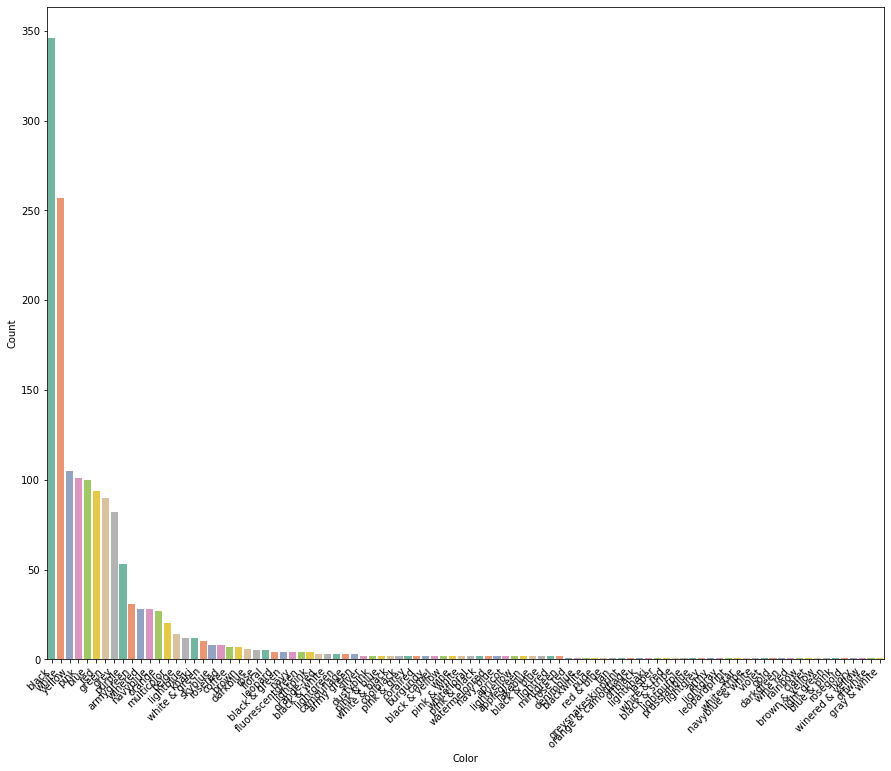

In [760]:
import seaborn as sns
plt.figure(figsize=(15, 12))                   #this show the most frequency colors                    
ax = sns.countplot(x = 'product_color',
                   order = df['product_color'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='Color', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [761]:
df.drop('product_color' , inplace=True , axis=1)   #dropped the color column  by using it or not, no improve in the model    

In [762]:
df.isnull().sum()                 #this for check if the data has any null values

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
countries_shipped_to            0
merchant_info_subtitle          1
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
discounted_price                0
n_tags                          0
tag_summer                      0
tag_women's fashion             0
tag_fashion                     0
tag_women                       0
tag_casual                      0
tag_plus size                   0
tag_sleeveless                  0
tag_dress                       0
tag_shorts                      0
tag_tops      

In [763]:
# df.drop('discounted_price', axis=1, inplace=True)

# Check product_variation_size_id coloumn and make some updates on it 

In [764]:
#show the values count of Products size 
print(df['product_variation_size_id'].value_counts()) 

S                647
XS               357
M                204
XXS              102
L                 50
                ... 
2                  1
20PCS-10PAIRS      1
Size-5XL           1
Size/S             1
36                 1
Name: product_variation_size_id, Length: 106, dtype: int64


In [765]:
#show the the values of the product size "different size"
df['product_variation_size_id'].unique()               

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01', 'S(Pink & Black)', '32/L', 'daughter

In [766]:
# df['product_variation_size_id'].astype(str)  #convert the values to string
# df['product_variation_size_id'] = str(df['product_variation_size_id'])
# type(df['product_variation_size_id'])

In [767]:
#in below cell i replace some of sizes to main sizes as below 

In [768]:
df['product_variation_size_id'].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 
                                         'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 
                                         'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..',
                                         'S(Pink & Black)'], 'S', inplace=True)
df['product_variation_size_id'].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
df['product_variation_size_id'].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS',
                                         'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
df['product_variation_size_id'].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
df['product_variation_size_id'].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
df['product_variation_size_id'].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
df['product_variation_size_id'].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 
                                         'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 
                                         'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
size_val_counts = df['product_variation_size_id'].value_counts()
# Select the values where the count is less than 5 
to_change = size_val_counts[size_val_counts <= 5].index
df.loc[df['product_variation_size_id'].isin(to_change), 'product_variation_size_id'] = "Other"
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, "Other")

In [769]:
df['product_variation_size_id'].value_counts()

S        696
XS       370
M        210
XXS+     115
Other     69
L         56
XXL+      34
XL        23
Name: product_variation_size_id, dtype: int64

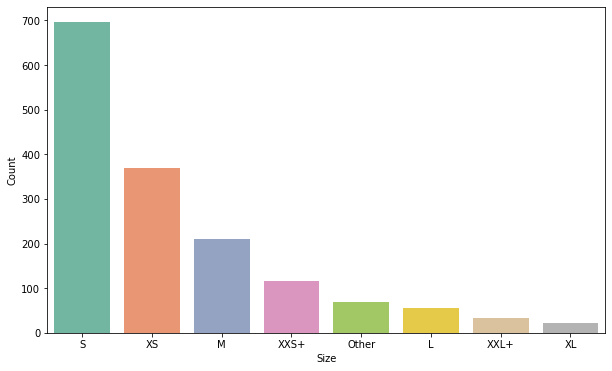

In [770]:
#this show the most repeated sizes and the number of repeats
plt.figure(figsize=(10, 6))                               
ax = sns.countplot(x = 'product_variation_size_id',
                   order = df['product_variation_size_id'].value_counts().index,
                   palette= "Set2",
                   data=df)
ax.set(xlabel='Size', ylabel='Count')

plt.show()

In [771]:
df.head()                      #show the data after make some preprocessing on it 

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,tag_sexy,tag_beach,tag_sleeve,tag_short sleeves,tag_print,tag_shirt,tag_tank,tag_necks,tag_v-neck,tag_printed
0,8.00,7,10000,1,4,1670,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,8.00,7,1000,0,4,843,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,6.00,34,100,0,4,10,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,4.67,4,100,1,3,82,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,8.00,11,1000,0,4,127,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0


# here we convert the categorical data to numeric values


In [772]:
# df = pd.get_dummies(df, columns=['product_color'], prefix='color_', drop_first=True)
df = pd.get_dummies(df, columns=['product_variation_size_id'], prefix='size_', drop_first=True)

In [773]:
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,tag_necks,tag_v-neck,tag_printed,size__M,size__Other,size__S,size__XL,size__XS,size__XXL+,size__XXS+
0,8.00,7,10000,1,4,1670,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8.00,7,1000,0,4,843,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.00,34,100,0,4,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.67,4,100,1,3,82,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8.00,11,1000,0,4,127,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,16.00,14,100,1,0,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1569,6.00,17,5000,1,0,817,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1570,4.83,51,50,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1571,3.00,3,100,1,0,8,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# merchant_info_subtitle column
The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user to give an overview of the seller's stats to the user. Mostly consists of % ( reviews) written in french
so we can get this percentage to save it in new feature called merchant_positive_pct

In [774]:
df['merchant_info_subtitle'].value_counts()


83 % avis positifs (32,168 notes)    14
86 % avis positifs (12,309 notes)    11
87 % avis positifs (42,919 notes)     8
85 % avis positifs (80,093 notes)     7
84 % avis positifs (5,654 notes)      6
                                     ..
77 % avis positifs (849 notes)        1
82 % avis positifs (870 notes)        1
90 % avis positifs (6,033 notes)      1
(12,913 notes)                        1
87 % avis positifs (1,086 notes)      1
Name: merchant_info_subtitle, Length: 1058, dtype: int64

In [775]:
#here we get the percentage for each row in merchant_info_subtitle col
import re                                         
def getPercentage(x): 
    match = re.search(r'\d+%', str(x))
    if match is None:
        return None
    else:
        return float(match.group().rstrip("%"))

In [776]:
df['merchant_info_subtitle'] = df['merchant_info_subtitle'].str.replace(' ', '')
df['merchant_positive_pct'] = df['merchant_info_subtitle'].apply(getPercentage)
df['merchant_positive_pct'].head()

0    88.0
1    91.0
2    83.0
3    87.0
4    91.0
Name: merchant_positive_pct, dtype: float64

In [777]:
#fill any null values by the mean of total 
df['merchant_positive_pct'].fillna((df['merchant_positive_pct'].mean()), inplace=True)

In [778]:
# after i take the percentage for each row and 
# generate new col i will drop merchant_info_subtitle
df.drop('merchant_info_subtitle' , axis=1 , inplace=True)

In [779]:
# df.drop(['product_color','product_variation_size_id'] , inplace=True , axis=1)

In [780]:
df.drop('discounted_price' , inplace=True , axis = 1) 

# now we can split data after we made preprocssing 

In [781]:
train_data_rows = train_data.shape[0]                       #number of rows train_new dataset 
train_data_cleaned = df.iloc[:train_data_rows]              #split df after preprocessing until train_data_rows
print(train_data_cleaned.shape)                             #to show the train_data_cleaned shape
test_data_cleaned = df.iloc[train_data_rows :]              #split df after preprocessing from train_data_rows to last row
print(test_data_cleaned.shape)
test_data_cleaned= test_data_cleaned.drop('rating', axis=1) #drop the rating column from test_data_cleaned 

(1094, 45)
(479, 45)


In [782]:
test_data_cleaned.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,tag_v-neck,tag_printed,size__M,size__Other,size__S,size__XL,size__XS,size__XXL+,size__XXS+,merchant_positive_pct
1094,5.75,5,10,1,0,0,0,0,0,5,...,0,0,0,0,0,0,1,0,0,33.0
1095,7.00,7,5000,0,579,0,0,0,0,50,...,0,0,0,0,0,0,1,0,0,86.0
1096,5.00,16,1000,1,62,0,0,0,0,20,...,0,0,0,0,0,0,1,0,0,85.0
1097,18.00,27,5000,1,1903,0,0,0,0,50,...,0,0,1,0,0,0,0,0,0,86.0
1098,12.00,81,20000,0,1799,0,0,0,0,50,...,0,0,1,0,0,0,0,0,0,88.0


In [783]:
# df=df.fillna(0)                        #missing_values_table in dataset 
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
df_qa=missing_values_table(df)
df_qa


Your selected dataframe has 45 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [784]:
test_data_cleaned.isnull().sum()             #check if we have any null values in test dataset 

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_inventory     0
shipping_option_price           0
countries_shipped_to            0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
n_tags                          0
tag_summer                      0
tag_women's fashion             0
tag_fashion                     0
tag_women                       0
tag_casual                      0
tag_plus size                   0
tag_sleeveless                  0
tag_dress                       0
tag_shorts                      0
tag_tops                        0
tag_sexy                        0
tag_beach                       0
tag_sleeve                      0
tag_short slee

In [785]:
train_data_cleaned.isnull().sum()                 #check if we have any null values in test dataset 

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_inventory     0
shipping_option_price           0
countries_shipped_to            0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
n_tags                          0
tag_summer                      0
tag_women's fashion             0
tag_fashion                     0
tag_women                       0
tag_casual                      0
tag_plus size                   0
tag_sleeveless                  0
tag_dress                       0
tag_shorts                      0
tag_tops                        0
tag_sexy                        0
tag_beach                       0
tag_sleeve    

In [786]:
%matplotlib inline                           #this show some features hist
train_data_cleaned.hist(bins = 50, figsize=(20,16)) 
plt.show()

UsageError: unrecognized arguments: #this show some features hist


In [787]:
%matplotlib inline                           #this show some features hist
test_data_cleaned.hist(bins = 50, figsize=(20,16)) 
plt.show()

UsageError: unrecognized arguments: #this show some features hist


# Classification models

In [788]:
#import some model to use it 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

In [789]:
#make varible called "X" "input" contains all columns without rating column
X=train_data_cleaned.drop(columns ='rating' )   
#make varaible called "y" "target" contain only rating column
y= train_data_cleaned['rating']                 
print(X.shape)
print(y.shape)

(1094, 44)
(1094,)


In [790]:
#make X_train, X_test, y_train, y_test on train data to train our model and test it 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = .2,random_state=10 , shuffle=True)
#when i use the all train data to fit the model the the predicted value improved so i use all data to fit the model 

# DecisionTreeClassifier mode
By using DecisionTreeClassifier model f1 on the kaggle 
range from 75 to 80 % depend on the different parameters 

In [791]:
ds=DecisionTreeClassifier(random_state=10 ,criterion='entropy',max_depth = 20 )#this when we use different Parameters 
# ds=DecisionTreeClassifier()  #this model without hyperparameter2
ds.fit(X , y) #fit the model  on all train dataset
pred=ds.predict(X) #test our model
f1_score(y, pred,average = 'weighted')  #check the model f1 score
#when i tried DecisionTreeClassifier by the default parameters f1 on kaggle become 79 and 80 % 
#and when i use other parameters the f1 changed 

0.9927469454945528

In [792]:
y_pred_test=ds.predict(test_data_cleaned)  #test the trained model on the test data 
y_pred_test= y_pred_test.astype(float) #convert the out put to float datatype 

In [793]:
id = test_data['id']                                                           #in this line i take id from sample data 
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_pred_test})     #take prediction values and id to make df and 
pred_df.to_csv('pred_TES.csv', index=False)                                   #save them in csv file

In [794]:
# y_pred= pd.DataFrame(np.array(y_pred_test))
# y_pred.value_counts()

# RandomForestClassifier model

In [795]:
# rfc= RandomForestClassifier(n_estimators =50, random_state=10)    #this when we use different Parameters  
rfc= RandomForestClassifier() #make model randomforestclassifier     "this give us best f1 score on kaggle"
rfc.fit(X , y) #train the model 
pred=rfc.predict(X)   #test the model 
# f1_score(y_test, pred,average = 'weighted')
f1_score(y, pred,average = 'weighted')   #check the f1 score of the model
#when i tried DecisionTreeClassifier by the default parameters f1 on kaggle become 81 and 83 % 
#and when i use other parameters the f1 changed 

0.9926006016105771

In [796]:
y_pred=rfc.predict(test_data_cleaned)                                 #make predictions for the test data 
y_pred= y_pred.astype(float)                                          #convert the output to float datatype

In [797]:
id = test_data['id']                                                  #in this line i take id from sample data 
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_pred}) #take prediction values and id to make df and
pred_df.to_csv('pred_TEST_final.csv', index=False)                    #save them in csv file

In [798]:
# y_pred= pd.DataFrame(np.array(y_pred))
# y_pred.value_counts()

# Support vector machines model

In [799]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X)

In [409]:
#By using DecisionTreeClassifier model f1 on the kaggle range from 75 to 80 % depend on the different parameters 

In [803]:
model_svc = SVC(gamma = 0.01 , C=1 , degree= 10) #create object from SVM
model_svc.fit(X_train_scaled, y)               #train the model 
svc_pred = model_svc.predict(X_train_scaled)   #predict the train data to check the model 
#this check the accurracy and f1 score of svc model 
svc_accuracy = accuracy_score(y, svc_pred) 
svc_f1 = f1_score(y, svc_pred, average='weighted')
print('Accuracy : ', "%.2f" % (svc_accuracy*100))
print('F1 : ', "%.2f" % (svc_f1*100))
#when i tried Support vector machinesr by the default parameters f1 on kaggle  become 70 to 75  % 
#and when i use other parameters the f1 changed 

Accuracy :  75.05
F1 :  67.85


In [804]:
y_predsvc=model_svc.predict(test_data_cleaned) #make predictions for the test data 
y_predsvc= y_predsvc.astype(float)             #convert the output to float datatype

In [805]:
id = test_data['id']                                                       #in this line i take id from sample data
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predsvc})   #take prediction values and id to make df and
pred_df.to_csv('predcsv.csv', index=False)                                 #save them in csv file

In [806]:
# y_pred= pd.DataFrame(np.array(y_predsvc))
# y_pred.value_counts()

# GaussianNB model
this is the worst model i used it on this data 

In [807]:
model_GNB=GaussianNB()                     #genetrate model GaussianNB() without perparameters 
# model_GNB=GaussianNB(var_smoothing=1e-2) #genetrate model GaussianNB() with    perparameters 
model_GNB.fit(X , y)                       #train the model on train data
predGNB=model_GNB.predict(X)            #test the model on train data 
f1_score(y, predGNB,average = 'weighted')  #check f1 score for our model 


0.5360514059431413

In [808]:
y_predGNB=model_GNB.predict(test_data_cleaned)  #predict the test data 
predGNB= y_predGNB.astype(float)                #convert the output to float datatype 

In [809]:
id = test_data['id']                                                       #in this line i take id from sample data
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predsvc})   #take prediction values and id to make df and
pred_df.to_csv('predGaussianNB.csv', index=False)                                 #save them in csv file

In [810]:
# predGNB_test= pd.DataFrame(np.array(predGNB))
# predGNB_test.value_counts()

# CategoricalNB model 
this works on categorical data 

In [814]:
from sklearn.preprocessing import MinMaxScaler #using pipleine to make apply this steps 
                                              # "Normalizing" ana "CategoricalNB"
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',CategoricalNB())]) 
p.fit(X,y)                     #train the model on train data 
pre_CategoricalNB=p.predict(X) #test the model on train data 
f1_score(y, pre_CategoricalNB,average = 'weighted') #check the value of f1 score 

0.6537742417637844

In [815]:
y_CategoricalNB=p.predict(test_data_cleaned.astype(float))      #predict the test data 
# predCategoricalNB= y_CategoricalNB.astype(float)  #convert the output to float datatype 

In [817]:
id = test_data['id']                                                       #in this line i take id from sample data
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predsvc})   #take prediction values and id to make df and
pred_df.to_csv('predCategoricalNB.csv', index=False)                                 #save them in csv file

In [ ]:
#finally the best model i used it here is RandomForestClassifier model and DecisionTreeClassifier mode 